In [1]:
from keras.datasets import mnist
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np


/Users/piyush/workspace/projects/MachineLearning/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(x_train.min())
print(x_train.max())


(60000, 28, 28)
(10000, 28, 28)
0
255


<Figure size 640x480 with 0 Axes>

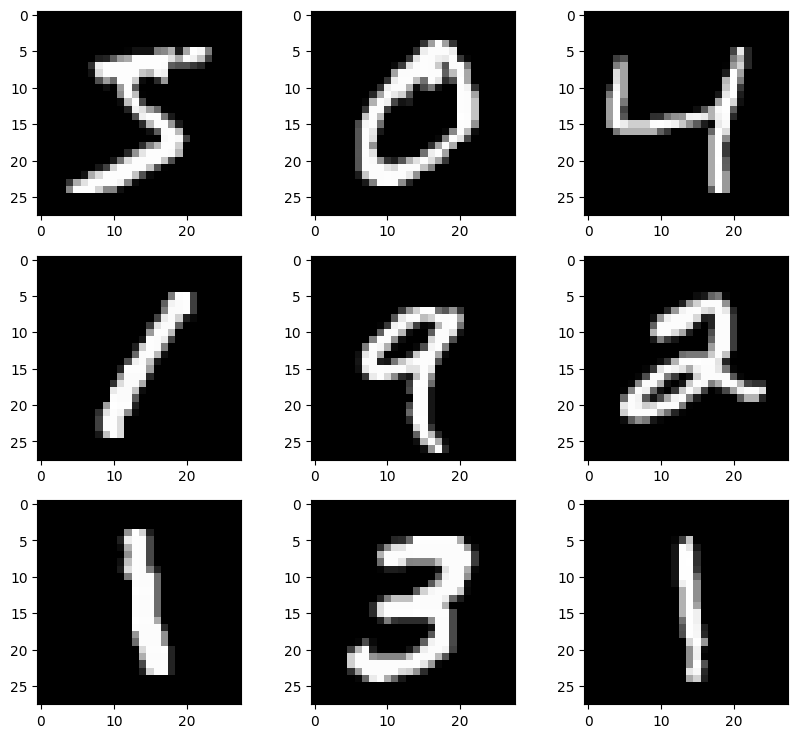

In [3]:
plt.gray() # B/W Images
plt.figure(figsize = (10,9)) # Adjusting figure size
# Displaying a grid of 3x3 images
for i in range(9):
 plt.subplot(3,3,i+1)
 plt.imshow(x_train[i])


In [4]:
# Conversion to float
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
# Normalization
x_train = x_train/255.0
x_test = x_test/255.0
# Checking the minimum and maximum values of x_train
print(x_train.min())
print(x_train.max())


0.0
1.0


In [5]:
# Reshaping input data
X_train = x_train.reshape(len(x_train),-1)
X_test = x_test.reshape(len(x_test),-1)
# Checking the shape
print(X_train.shape)
print(X_test.shape)


(60000, 784)
(10000, 784)


In [6]:
def retrieve_info(cluster_labels,y_train):
  # Initializing
  reference_labels = {}
  # For loop to run through each label of cluster label
  for i in range(len(np.unique(kmeans.labels_))):
    index = np.where(cluster_labels == i,1,0)
    num = np.bincount(y_train[index==1]).argmax()
    reference_labels[i] = num
  return reference_labels

total_clusters = len(np.unique(y_train))
# Initialize the K-Means model
kmeans = MiniBatchKMeans(n_clusters = total_clusters)
# Fitting the model to training set
kmeans.fit(X_train)


MiniBatchKMeans(n_clusters=10)

In [7]:
reference_labels = retrieve_info(kmeans.labels_,y_train)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
  number_labels[i] = reference_labels[kmeans.labels_[i]]

# Comparing Predicted values and Actual values
print(number_labels[:20].astype('int'))
print(y_train[:20])


[3 0 4 1 7 2 1 2 1 7 3 1 3 6 1 7 2 7 6 7]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [8]:
# Calculating accuracy score
print(accuracy_score(number_labels,y_train))


0.5277833333333334


In [9]:
# Increase to 50 clusters, and fit the model
kmeans = MiniBatchKMeans(n_clusters = 50)
kmeans.fit(X_train)

# Calculating the reference_labels
reference_labels = retrieve_info(kmeans.labels_,y_train)
# ‘number_labels’ is a list which denotes the number displayed in image
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
 number_labels[i] = reference_labels[kmeans.labels_[i]]
print('Accuracy score : {}'.format(accuracy_score(number_labels,y_train)))
print('\n')


Accuracy score : 0.7875666666666666




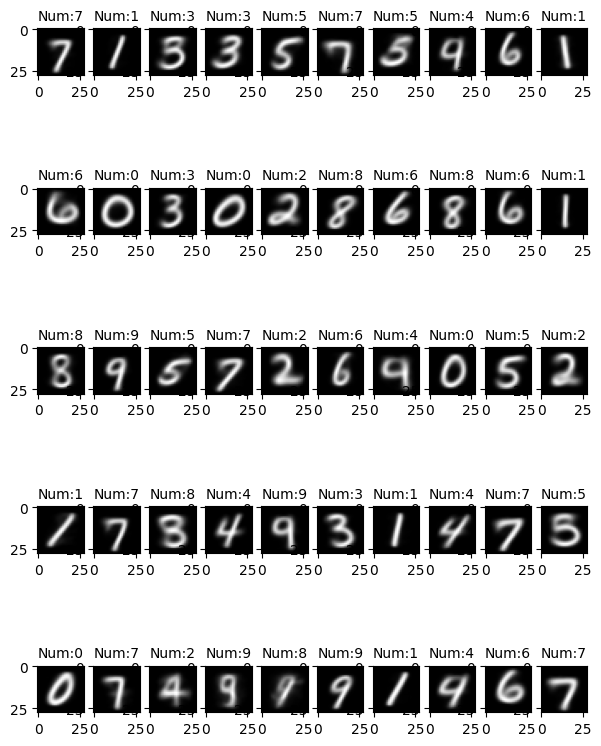

In [10]:
# Cluster centroids is stored in ‘centroids’
centroids = kmeans.cluster_centers_
centroids.shape
centroids = centroids.reshape(50,28,28)
centroids = centroids * 255
plt.figure(figsize = (10,10))
bottom = 0.35
for i in range(50):
 plt.subplots_adjust(bottom)
 plt.subplot(5,10,i+1)
 plt.title('Num:{}'.format(reference_labels[i]),fontsize = 10)
 plt.imshow(centroids[i])


## Homework Question 1

**Compare the accuracy of 10 clusters vs 50 clusters. Which one is better?**

- **10 clusters**: Accuracy = **0.5277 (52.77%)**  
- **50 clusters**: Accuracy = **0.7876 (78.76%)**  

**Answer**:  
The accuracy with **50 clusters** is significantly better than with **10 clusters**. This is because 50 clusters provide more granularity, allowing K-means to better distinguish between digit variations.

## Homework Question 2

### Inspection of Centroids in Step J

By visualizing the centroids (representative images for each cluster), we can assess how the **increase in clusters** impacts the model performance.

---

### **Observation**
1. **Cluster Separation**:  
   - With **50 clusters**, each centroid (visualized above) represents clearer and more distinct variations of digits.  
   - For example: The centroids for `7`, `1`, and `3` are visibly sharp, showcasing that the model effectively captures subtle differences in digit shapes.

2. **Digit Similarity**:  
   - Digits like `3` and `5` or `6` and `8` still share some visual similarity. While K-means struggles to perfectly separate them, **more clusters reduce the overlap** by capturing finer details.

3. **Blurry Digits**:  
   - Even with 50 clusters, some centroids (like `6` and `5`) still appear slightly blurry. This is due to K-means averaging similar digits into a single cluster when there is no perfect separation.

---

### **Impact of Increasing Clusters**
1. **Positive Impact**:  
   - Increasing the number of clusters improves performance because it provides:  
     - **More granularity** to differentiate similar digits.  
     - Better representation of variations within the same digit class (e.g., slanted `7` vs straight `7`).  
   - Accuracy improves from **52.77%** (10 clusters) to **78.76%** (50 clusters).

2. **Negative Impact**:  
   - **Overfitting Risk**: Adding too many clusters may result in splitting meaningful digit groups into redundant sub-clusters.  
   - **Computational Cost**: More clusters increase computational overhead during clustering and evaluation.

---

### **Conclusion**
- Increasing the number of clusters to **50** has a **positive impact** on model performance.  
- The centroids become clearer and better represent the actual digits, reducing confusion between similar shapes.  
- However, further increasing clusters beyond **50** may lead to diminishing returns or overfitting.

## Homework Question 3

**Comment on K-means performance for MNIST image clustering and insights.**

### **1. Performance:**
- K-means performs reasonably well but has limitations because:  
  - It assumes **spherical clusters**.  
  - Digits with similar shapes (e.g., `3` and `8`, `4` and `9`) are harder to differentiate.  
- Accuracy improves when the number of clusters is increased, as demonstrated with **78.76%** for **50 clusters**.

---

### **2. Insights:**
- **More clusters** lead to better representation of the data.  
- K-means can identify **general patterns** but is not ideal for highly complex image classification tasks.  
- Combining K-means with **dimensionality reduction** (e.g., PCA) or **supervised techniques** could further improve results.